In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import skimage.filters as filters
import skimage.exposure as exposure
from skimage.feature import greycomatrix, greycoprops

In [18]:
def bloodVessel(img):
    img = cv2.resize(img, (500, 500))
    

    return rmSmall

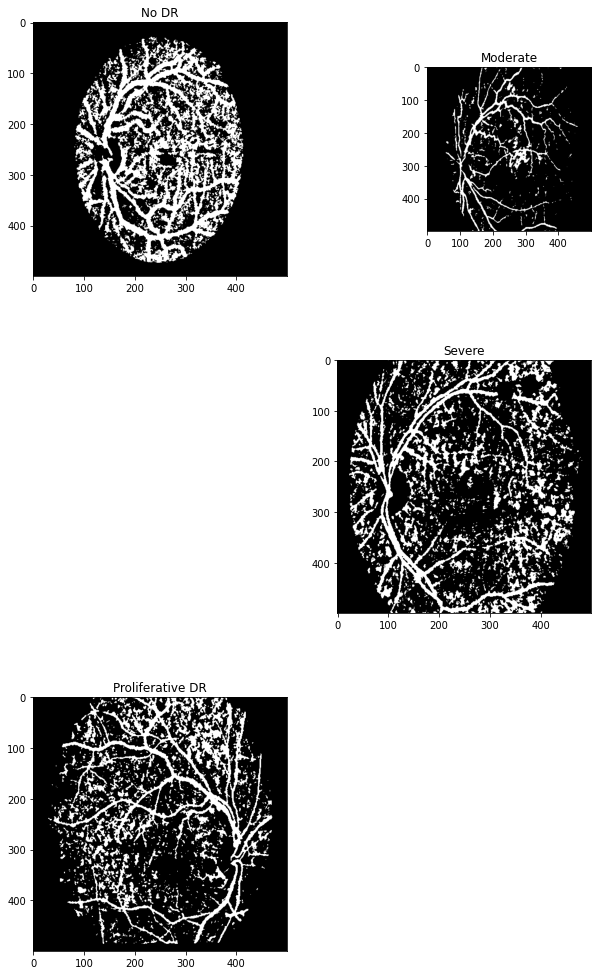

In [23]:
img0 = cv2.imread('D:/Pawang Code/Diabetic Retinopathy/dataset/0/00cc2b75cddd.png')
img1 = cv2.imread('D:/Pawang Code/Diabetic Retinopathy/dataset/1/38e0e28d35d3.png')
img2 = cv2.imread('D:/Pawang Code/Diabetic Retinopathy/dataset/2/3f5b4c2948e8.png')
img3 = cv2.imread('D:/Pawang Code/Diabetic Retinopathy/dataset/3/8688f3d0fcaf.png')
img4 = cv2.imread('D:/Pawang Code/Diabetic Retinopathy/dataset/4/613028ede6a0.png')

# img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img0 = bloodVessel(img0)
img1 = bloodVessel(img1)
img2 = bloodVessel(img2)
img3 = bloodVessel(img3)
img4 = bloodVessel(img4)

plt.figure(figsize=(20, 30))
plt.suptitle('removing very small contours', fontsize=20, fontweight='bold')
plt.subplot(5, 3, 1)
plt.title('No DR')
plt.imshow(img0, cmap='gray', vmin=0, vmax=255)
plt.subplot(5, 3, 2)
plt.title('Mild')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(5, 3, 3)
plt.title('Moderate')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.subplot(5, 3, 4)
plt.title('Severe')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.subplot(5, 3, 5)
plt.title('Proliferative DR')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

In [20]:
def glcm(img):
    glcm_feature = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    distance = [5]
    angles = [0]
    level = 256
    symetric = True
    normed = True

    glcm = greycomatrix(img, distance, angles, level, symmetric=symetric, normed=normed)
    glcm_props = [property for name in glcm_feature for property in greycoprops(glcm, name)[0]]

    return glcm_props

In [22]:
glcm0 = glcm(img0)
glcm1 = glcm(img1)
glcm2 = glcm(img2)
glcm3 = glcm(img3)
glcm4 = glcm(img4)

print(glcm0)
print(glcm1)
print(glcm2)
print(glcm3)
print(glcm4)

[12577.279999999999, 49.32266666666666, 0.8065807523144588, 0.48442494432812977, 0.6960064254934215, 0.46206603014461833]
[6968.052727272727, 27.325696969696967, 0.8928420519903928, 0.7337594071788593, 0.8565975759823625, 0.37173444884069684]
[8125.103636363637, 31.863151515151518, 0.8750483862399097, 0.719485945483114, 0.8482251738088855, 0.270019952888093]
[17595.370909090907, 69.00145454545455, 0.7294102219252159, 0.4447287150617284, 0.6668798355489004, 0.24393649132538436]
[15698.480000000001, 61.56266666666667, 0.7585814904807309, 0.4902527702234466, 0.7001805268810656, 0.26082347068600525]
